In [65]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt


(trainX, trainy), (testX, testy) = mnist.load_data()

In [113]:
indexes = []
numbers = [0,1,2,3,4,5,6,7,8,9]
for i in list(testy):
    if i in numbers:
        indexes.append(list(testy).index(i))
    

In [67]:
indexesUpd = list(set(indexes))

In [76]:
arrayOfNumbers = []
for i in indexesUpd:
    arrayOfNumbers.append(testX[i].tolist())

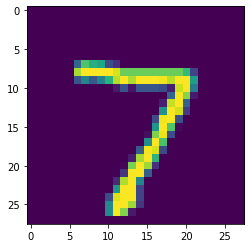

In [88]:
plt.imshow(arrayOfNumbers[0])

In [85]:
import numpy as np 
import cv2
binaryFormat = []
for i in arrayOfNumbers:
    r, bw = cv2.threshold(np.array(i).astype('uint8'),127,255,cv2.THRESH_BINARY)
    binaryFormat.append(bw)

In [89]:
binaryFormatGrey = []
for i in binaryFormat:
    i = np.array(i).astype('uint8')
    i[i==0]=1
    i[i==255]=0
    binaryFormatGrey.append(i)

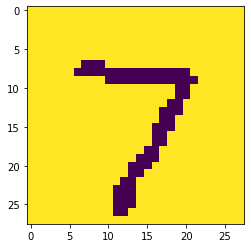

In [96]:
plt.imshow(binaryFormatGrey[0])

In [142]:
def addingNoise(initialImg, noise=0.2):
    img = initialImg.shape
    noiseBern = np.random.binomial(1, noise, img)
    noiseImg = initialImg + noiseBern
    noiseImg[noiseImg == 2] = 0
    return noiseImg

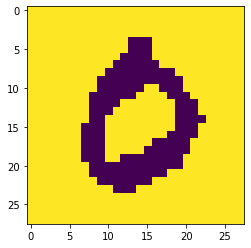

In [147]:
plt.imshow(binaryFormatGrey[3])

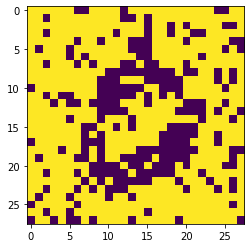

In [148]:
plt.imshow(addingNoise(binaryFormatGrey[3]))

In [196]:
def recognition(noiseImg, allImg):
    p = 1/len(numbers)
    sums = []
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
        total = []
        for x_row, k_row in zip(noiseImg, allImg[i]):
            for x, k in zip(x_row, k_row):
                result = 0 
                if x == 0 and k == 0:
                    result = np.log(1-p)
                if x == 1 and k == 1:
                    result = 0
                if (x == 0 and k == 1) or (x == 1 and k== 0):
                    result = np.log(p)
                total.append(result)
        sums.append(sum(total))
    return np.argmax(sums)

In [221]:
noised = addingNoise(binaryFormatGrey[0], noise=0.4)

In [222]:
indexOfRecognImg = recognition(noised, binaryFormatGrey)
imgNumber = [7, 2, 1, 0, 4, 9, 5, 6, 3, 8]
print('recognition:',imgNumber[indexOfRecognImg])

recognition: 7


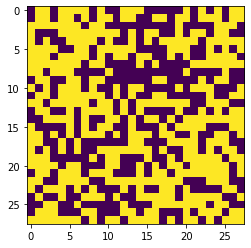

In [223]:
plt.imshow(noised)

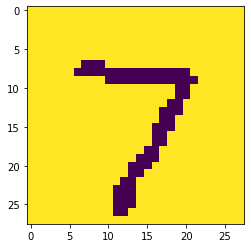

In [224]:
plt.imshow(binaryFormatGrey[0])